In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib widget

df = pd.read_csv("vid/1vidraw.csv")
df = df.dropna(subset=['x', 'y'])

df['mag'] = (df['x']**2 + df['y']**2)**0.5

df

,t,x,y,mag
0,0.000000,0.009858,0.049984,0.050947
5,0.083341,0.009967,0.050105,0.051086
10,0.166681,0.009857,0.049921,0.050885
15,0.250022,0.009921,0.049983,0.050958
20,0.333363,0.009924,0.050173,0.051145
...,...,...,...,...
2185,36.419860,0.009875,0.049616,0.050590
2190,36.503200,0.009873,0.049527,0.050502
2195,36.586540,0.009874,0.049572,0.050546
2200,36.669880,0.009918,0.049526,0.050510


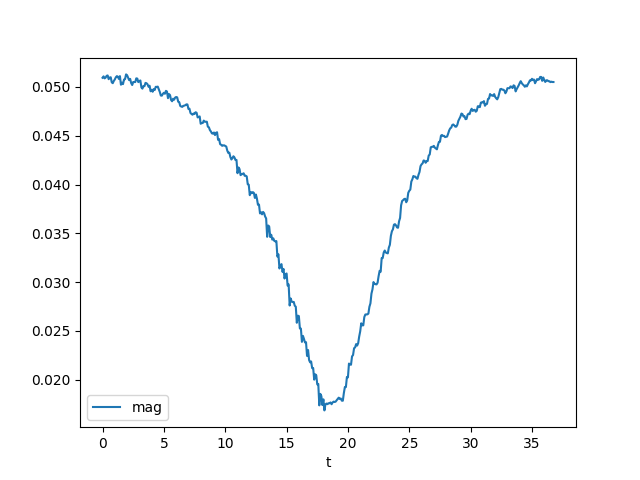

In [2]:
# plt.plot(df['t'], df['mag'])
df.plot('t','mag')
plt.show()


,des,motor,enc,rad_out,deg_out,rad_in,contract,t
0,0,129,859,-0.916298,-52.500000,-17.916896,53.063441,0.000
1,0,129,859,-0.916298,-52.500000,-17.916896,53.063441,0.202
2,0,129,858,-0.910162,-52.148438,-17.916896,52.762014,0.404
3,0,129,859,-0.916298,-52.500000,-17.916896,53.063441,0.606
4,0,129,859,-0.916298,-52.500000,-17.916896,53.063441,0.808
...,...,...,...,...,...,...,...,...
213,7,449,858,-0.910162,-52.148438,-10.062914,52.762014,43.026
214,7,449,858,-0.910162,-52.148438,-10.062914,52.762014,43.228
215,7,449,858,-0.910162,-52.148438,-10.062914,52.762014,43.430
216,7,449,858,-0.910162,-52.148438,-10.062914,52.762014,43.632


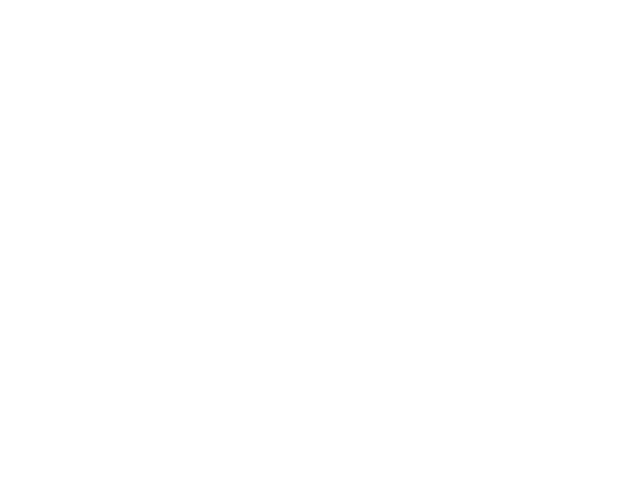

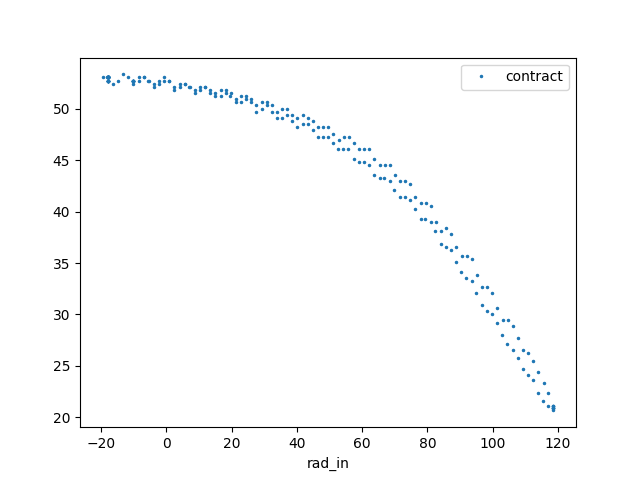

In [3]:
df_enc = pd.read_csv(f"./txt/2.csv")
enc_zero = df_enc['enc'][0]
enc_start = np.deg2rad(-52.5)
motor_zero = df_enc['enc'][0]

df_enc['rad_out'] = -((df_enc['enc'] - enc_zero) *2*np.pi / 1024.0) + enc_start
df_enc['deg_out'] = np.rad2deg(df_enc['rad_out'])

df_enc['rad_in'] = (df_enc['motor'] - motor_zero) *2*np.pi / 256.0

r_motor_pivot = 65.683 #mm
df_enc["contract"] = np.sqrt(50**2 + r_motor_pivot**2 - 2*50*r_motor_pivot*np.cos(df_enc['rad_out']))

df_enc['t'] = df_enc.index * 0.202

plt.figure()
df_enc.plot('rad_in', 'contract', style='.', markersize=3)

df_enc



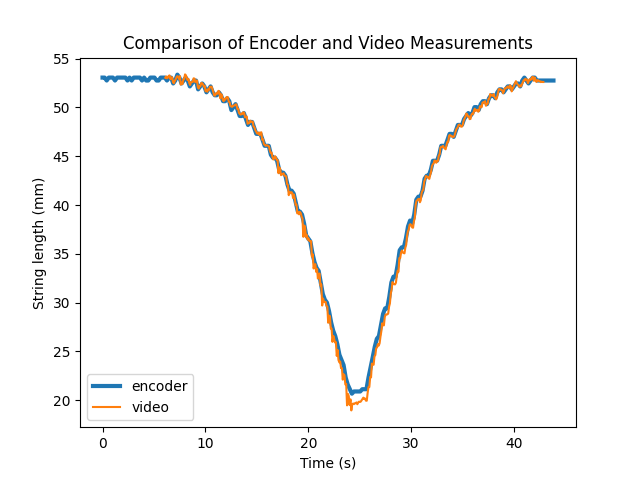

In [4]:
df['contract'] = df['mag'] * 1000 + 2.1
df['tshift'] = df['t'] + 6.1

plt.figure()
plt.title("Comparison of Encoder and Video Measurements")
plt.xlabel("Time (s)")
plt.ylabel("String length (mm)")
plt.plot(df_enc['t'], df_enc['contract'], linewidth=3, label='encoder')
plt.plot(df['tshift'],df['contract'], linewidth=1.5, label='video')
plt.legend()
plt.show()